In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.linalg import dft
import scipy

##  Лабораторная работа №2 «ДВПФ и ДПФ»

## Занятие 1. Основные свойства ДВПФ

In [5]:
#вариант 13
N, L, nu_0 = 9, 4, 0.1

## Задача 1.1.  Прямоугольный импульс в дискретной форме.  

С помощью моделирования  вычислите и постройте график для модуля и фазы ДВПФ  $X_N(\nu)$  последовательности из $N$ последовательных единичных импульсов ${{x}_{N}}[k]=\sum\limits_{m=0}^{N-1}{\mathbf{1}}\left[ k-m \right]$ для $\nu \in [-0,5; \;0,5]$.  Сравните результат с аналитической записью для  $X_N(\nu)$ (задача 1.б из задания к допуску).  Заполнить таблицу, используя результаты моделирования и аналитические записи. Принять частоту дискретизации равной 1 Гц.

$^2$ Для дискретного сигнала рассматривают энергию, приходящуюся на один период частоты, т.е. на полосу частот шириной ${{f}_{\text{д}}}$:

$\int_{-0,5{{f}_{\text{д}}}}^{0,5{{f}_{\text{д}}}}{|}X(f){{|}^{2}}df=\frac{1}{\Delta t}\int_{-1/2}^{1/2}{|}X(\nu ){{|}^{2}}d\nu $
Для ее вычисления можно воспользоваться равенством Парсеваля для ДВПФ.

**X (0) = 9**

**dNu = 0.22**

**Точки скачков фазы на Pi: $\pm 0.11, \pm 0.22, \pm 0.33, \pm 0.44$**

**Энергия: 9**


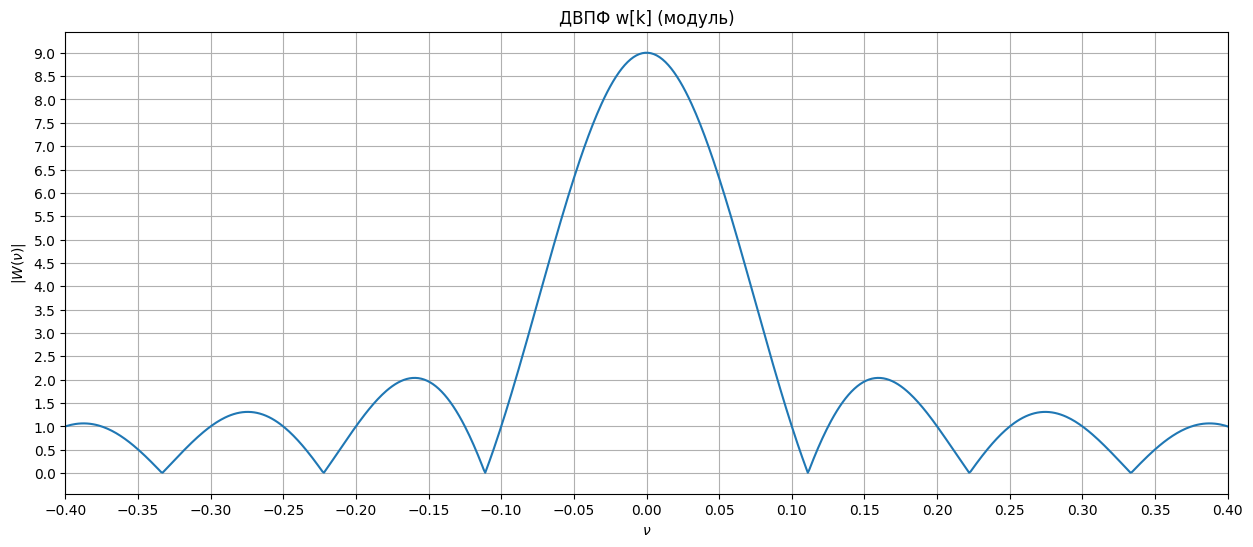

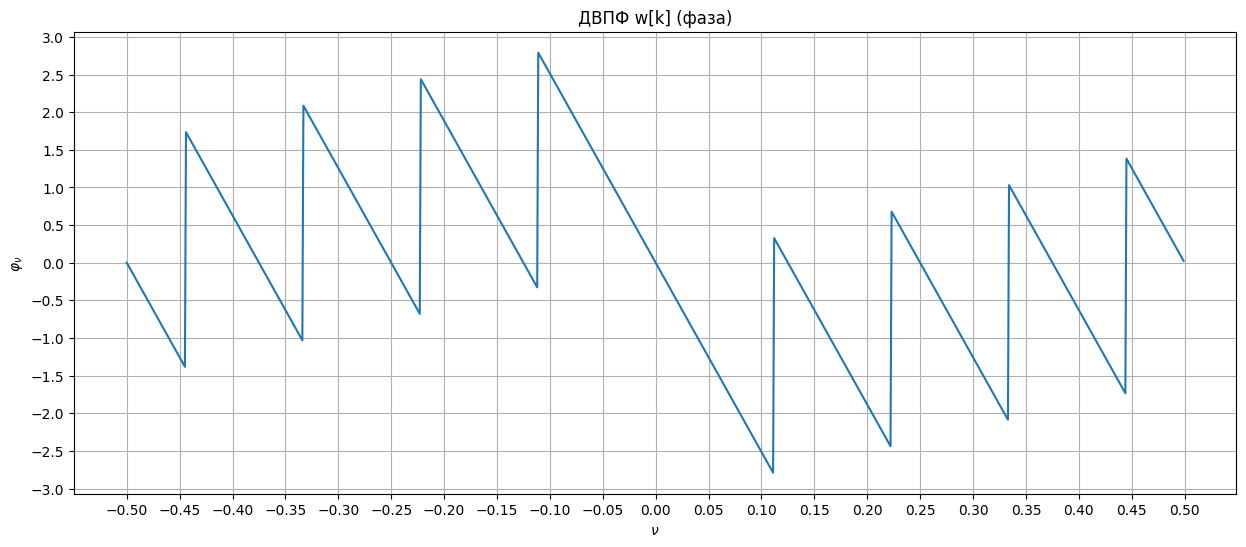

In [6]:
points_num = 1000

def plot_abs (x, xticks=np.arange(-0.4, 0.45, 0.05), yticks=np.arange(0, 9.5, 0.5)):
    plt.figure(figsize=[15,6])
    nu = np.arange(points_num) / points_num - 0.5
    dtft_x = np.fft.fftshift (np.fft.fft (x, points_num))
    plt.plot (nu, abs (dtft_x))

    plt.title ('ДВПФ w[k] (модуль)')
    plt.xlabel ('$\\nu$')
    plt.ylabel ('$|W (\\nu)|$')

    plt.xlim ([-0.4, 0.4])

    plt.grid ()

    plt.xticks(xticks)
    plt.yticks(yticks)
    return nu, dtft_x

def plot_arg (x):
    plt.figure (figsize=[15,6])
    nu = np.arange (points_num) / points_num - 0.5
    dtft_x = np.fft.fftshift (np.fft.fft (x, points_num))
    plt.plot (nu, np.angle (dtft_x))

    plt.title ('ДВПФ w[k] (фаза)')
    plt.xlabel ('$\\nu$')
    plt.ylabel ('$\\varphi_\\nu$')

    plt.grid ()
    plt.xticks(np.arange(-0.5, 0.55, 0.05))
    plt.yticks(np.arange(-3, 3.5, 0.5))
    return nu, dtft_x

x_n = np.ones(N)
nu, dtft_x = plot_abs(x_n)
plot_arg(x_n);

In [7]:
x_dict = {k: np.abs(v) for k, v in zip(nu, dtft_x)}

ys = [x_dict[nu]**2 for nu in x_dict.keys()]
print(scipy.integrate.simpson(ys, dx=0.001))

8.999000262711462


## Задача 1.2.  Свойство масштабирования.

Постройте последовательность ${{x}_{L}}[k]=\sum\limits_{m=-\infty }^{\infty }{{{x}_{N}}}[m]\mathbf{1}[k-mL]$, добавив $L-1$ нулевой отсчет между каждой парой соседних отсчетов сигнала ${{x}_{N}}[k]$ (из задачи 1.1). С помощью моделирования постройте модуль ее ДВПФ для $\nu \in [-0,5; \;0,5]$ и сравните результат с ${{X}_{N}}(\nu L)$ (из задачи 1.1).


**График размножился с частотой L**

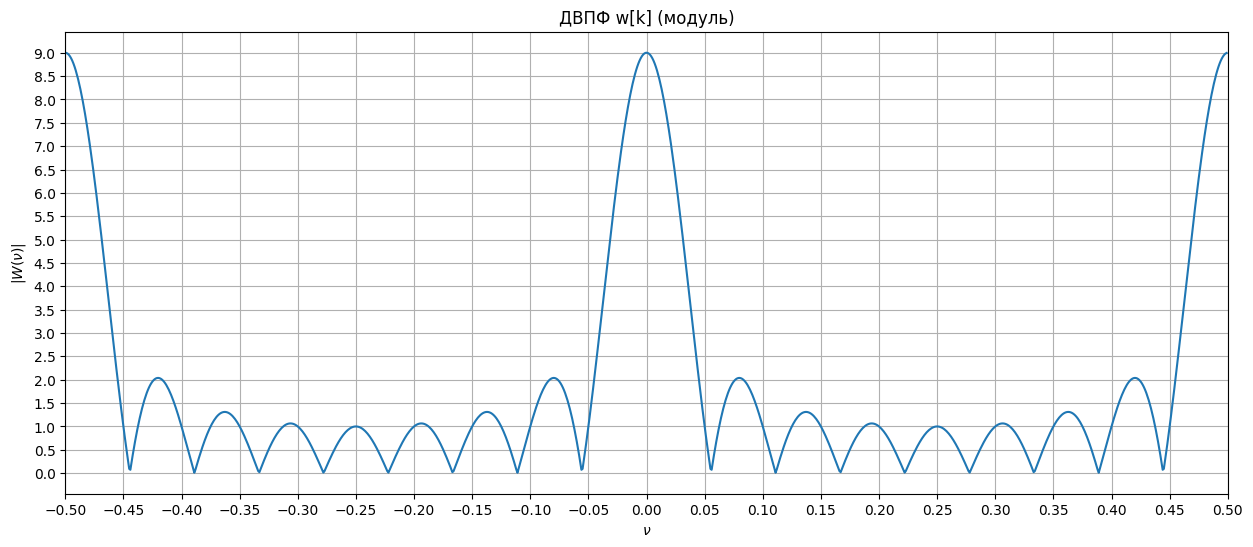

In [8]:
x_n_2 = x_n.copy()

insert = 1

stop = 2 * len(x_n_2) - 1
while insert != stop:
    x_n_2 = np.insert(x_n_2, insert, 0)
    insert += 2

plot_abs(x_n_2, xticks=np.arange(-0.5, 0.55, 0.05));

## Задача 1.3.  Дифференцирование спектральной плотности.
Рассмотрите последовательность ${{x}_{D}}[k]=k\,{{x}_{N}}[k]$.  Постройте с помощью моделирования график для модуля ДВПФ этой последовательности ${{X}_{D}}(\nu )$ для $\nu \in [-0,5; \;0,5]$.

** Получить численным или символьным дифференцированием график для $\frac{j}{2\pi }\frac{d{{X}_{N}}(\nu )}{d\nu }$ и сравнить его с ${{X}_{D}}(\nu ).$


C:\Users\khark\AppData\Local\Temp\ipykernel_15708\1480965049.py:6: RuntimeWarning: invalid value encountered in divide
  x_n_3_der = 1j / (2 * np.pi) * (1j * 2 * np.pi * N * np.exp(-1j * 2 * np.pi * nu_3 * N) * (1 - np.exp(-1j * 2 * np.pi * nu_3)) - \


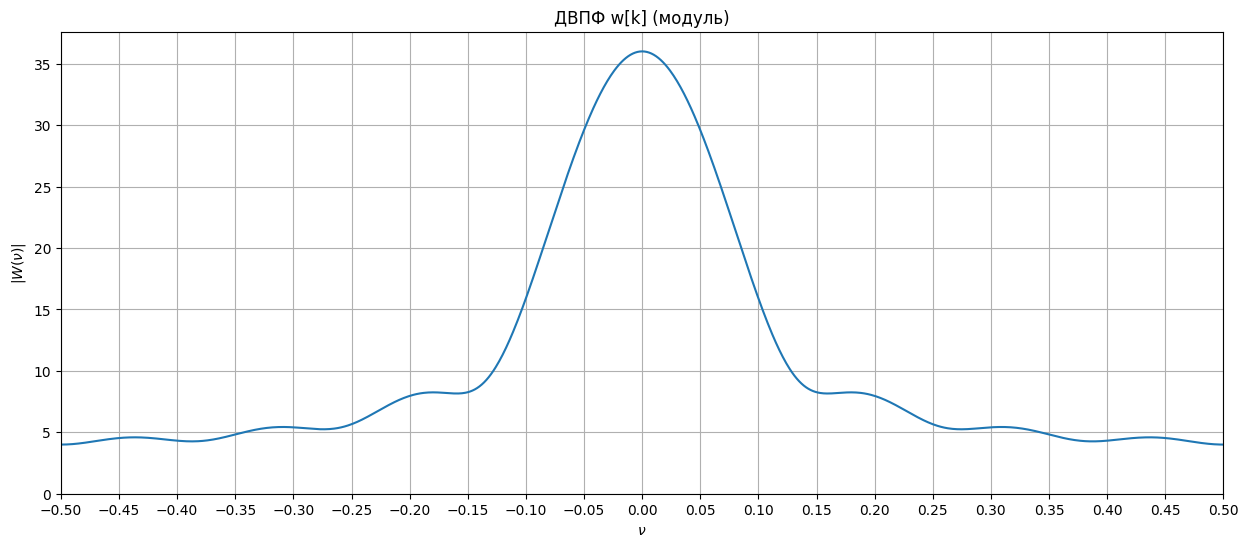

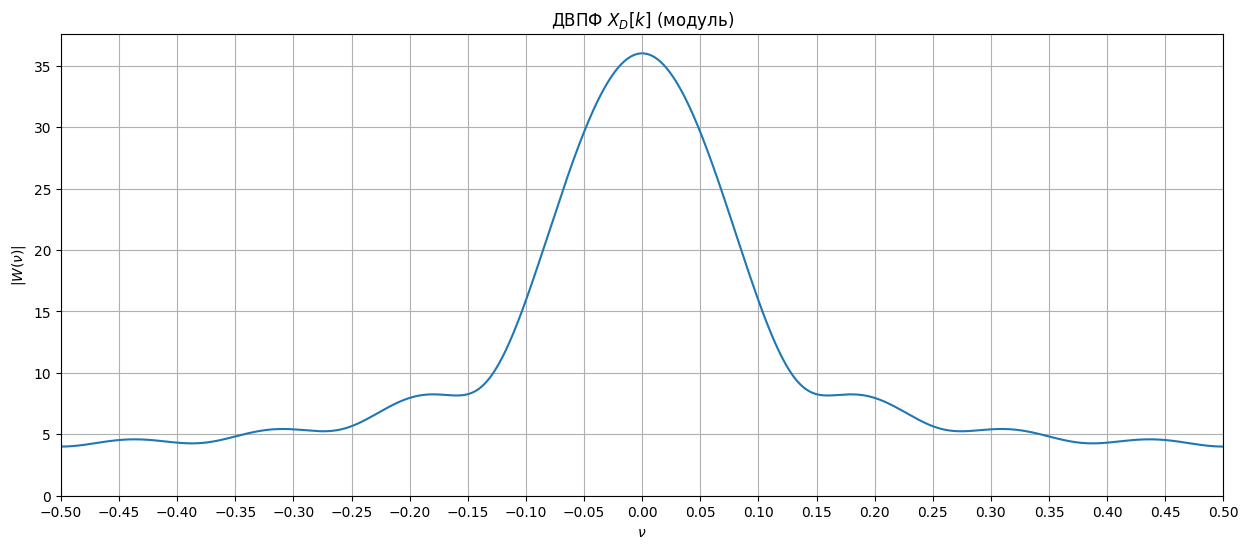

In [9]:
x_n_3 = np.array ([i * x_n [i] for i in range (N)])
nu_3 = np.arange (points_num) / points_num - 0.5

plot_abs(x_n_3, xticks=np.arange(-0.5, 0.55, 0.05), yticks=np.arange(0, 40, 5))

x_n_3_der = 1j / (2 * np.pi) * (1j * 2 * np.pi * N * np.exp(-1j * 2 * np.pi * nu_3 * N) * (1 - np.exp(-1j * 2 * np.pi * nu_3)) - \
                  (1 - np.exp(-1j * 2 * np.pi * nu_3 * N)) * 1j * 2 * np.pi * np.exp(-1j * 2 * np.pi * nu_3)) / ((1 - np.exp(-1j * 2 * np.pi * nu_3)) ** 2)

plt.figure (figsize=[15, 6])
plt.plot (nu_3, abs (x_n_3_der))

plt.xlim ([-0.5, 0.5])
plt.title ('ДВПФ $X_{D}[k]$ (модуль)')
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')
plt.xticks(np.arange(-0.5, 0.55, 0.05))
plt.yticks(np.arange(0, 40, 5))

plt.grid ()

## Задача 1.4. Теорема смещения.
С помощью моделирования получите график модуля спектральной плотности ${{X}_{S}}(\nu )$ для сигнала ${{x}_{S}}[k]={{x}_{N}}[k]\exp (j2\pi {{\nu }_{0}}k)$. Приведите ответы на следующие вопросы.

а) Какую аналитическую форму записи имеет функция ${{X}_{S}}(\nu )$?    **${{X}}(\nu - \nu_0 )$**

б) Как результат моделирования соотносится с теоремой смещения для ДВПФ? **Наблюдается смещение на $\nu_0$**

в) Почему получившийся спектр не симметричен относительно нулевой частоты? **Cобственно из-за теоремы смещения**


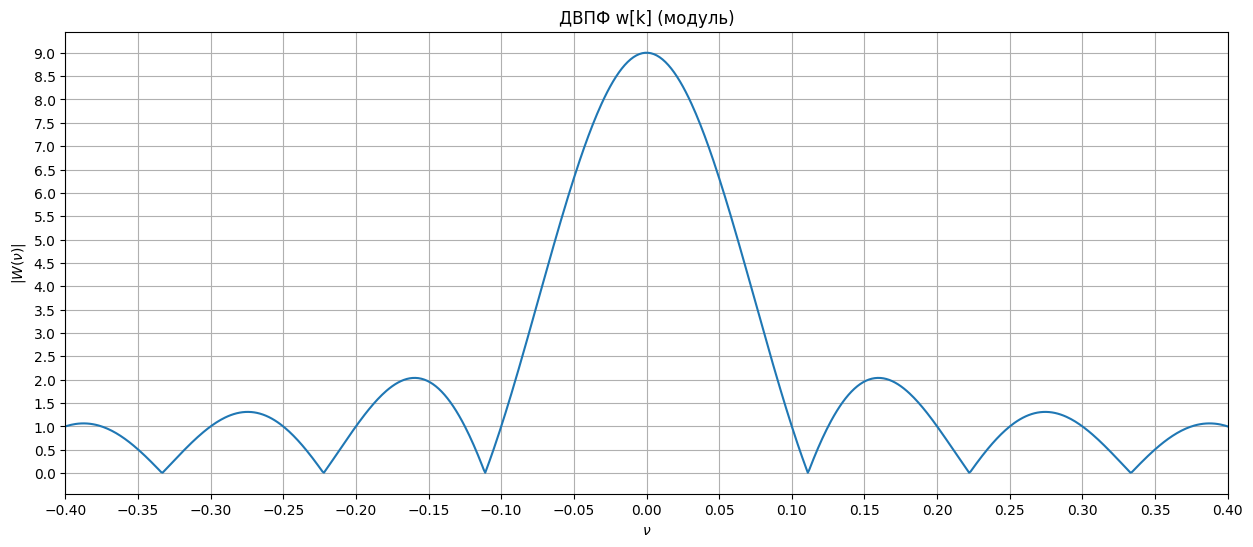

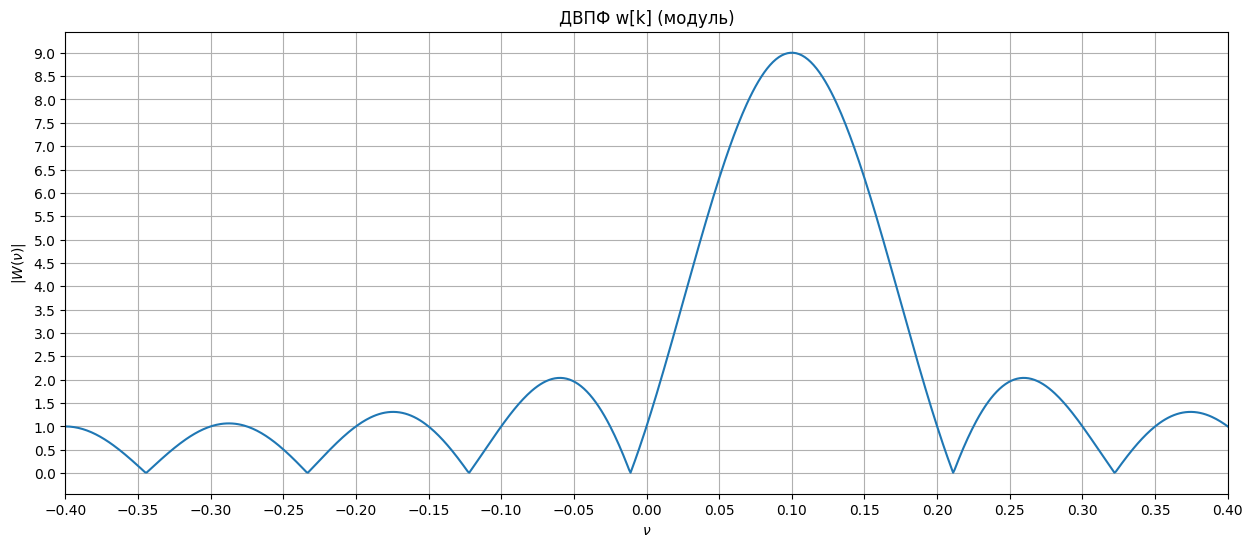

In [10]:
plot_abs (x_n)
x_n_4 = [np.exp (1j * 2 * np.pi * nu_0 * k) * x_n [k] for k in range (N)]
plot_abs (x_n_4);

## Задача 1.5. Теорема о свертке во временной области.

Вычислите с помощью моделирования линейную дискретную свертку последовательности ${{x}_{N}}[k]=\sum\limits_{m=0}^{N-1}{\mathbf{1}}\left[ k-m \right]$ с точно такой же последовательностью. Постройте график для модуля ДВПФ  этой последовательности. Воспользовавшись теоремой о свертке, получите аналитическую запись ДВПФ. Заполните таблицу.

**X (0) = 81**

**dNu = 0.22**

**Энергия = 489**

**Итоговый спектр является квадратом спектра исходного сигнала. Отсюда следует, что главный пик возвёлся в квадрат**

489.0


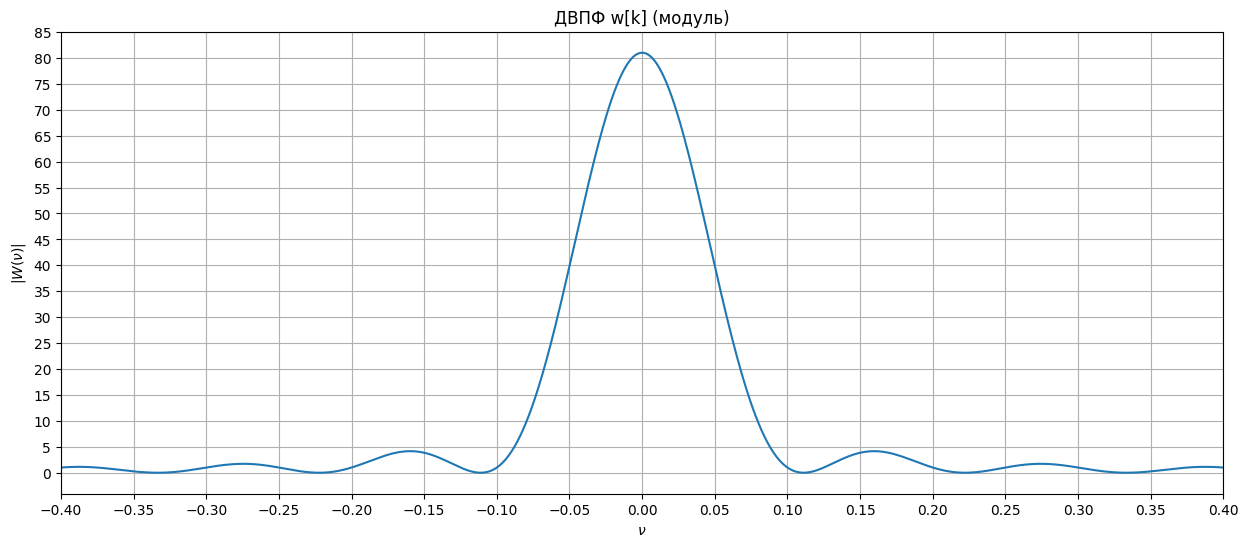

In [11]:
x_n_5 = signal.convolve(x_n, x_n)
print (np.sum (np.square (x_n_5)))
nu, dtft_x = plot_abs (x_n_5, yticks=np.arange(0, 90, 5));

In [12]:
print(max(dtft_x))
x_dict = {k: np.abs(v) for k, v in zip(nu, dtft_x)}

(81+0j)


## Занятие 2. Основные свойства ДПФ

## Задача 2.1. Алгоритмы вычисления ДПФ.

Вычислите ДПФ $X[n]$ для последовательности $x[k]$ (в соответствии с Вашим вариантом). Воспользуйтесь следующими способами:

а) вычисление с использованием матричной формы ДПФ;

б) алгоритм быстрого преобразование Фурье (БПФ).

Сравните результаты.
**Разница мала**

In [13]:
N = 8

# Вариант 13
x = np.array ([3, -6, -8, 4, 6, 7, 4, 9])
m = 6

W8 = dft(8)
matr = W8 @ x

X = ffft_x = np.fft.fft (x)
print(max (abs (matr - ffft_x)))

2.6645352591003757e-14


## Задача 2.2  Свойства симметрии ДПФ.

Для последовательности $x[k]$ постройте графики $\text{Re}\ X[n]$, $\text{Im}\ X[n]$, $\left| X[n] \right|$, $\angle \ X[n]$.

Сравните получившиеся результаты со свойствами симметрии ДПФ.
**Результаты соотносятся со свойствами сиимметрии. А именно действительная чать модуля симметрична, мнимая - антисимметрична.**

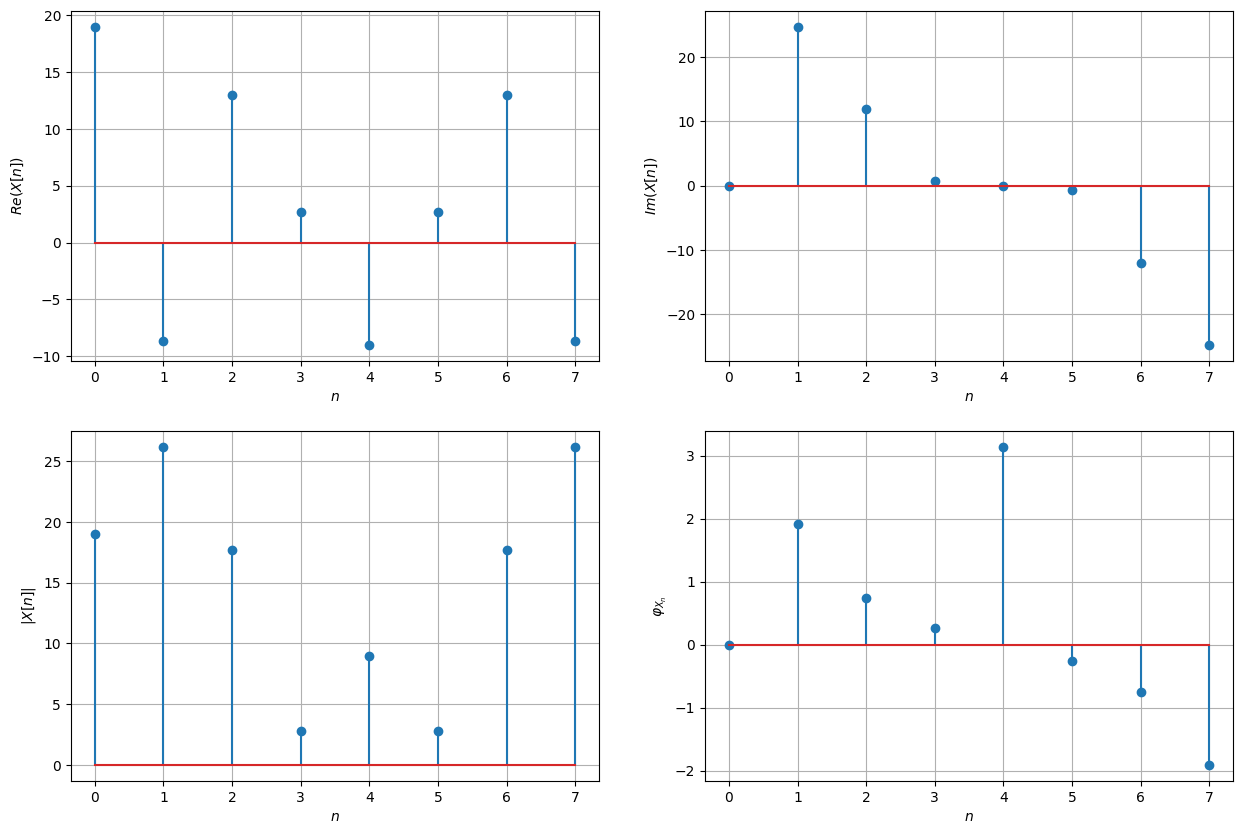

In [14]:
num = np.arange (8)

plt.figure (figsize=[15, 10])

plt.subplot (2, 2, 1)
plt.stem (num, ffft_x.real)
plt.xlabel ('$n$')
plt.ylabel ('$Re \\left(X [n]\\right)$')
plt.grid ()

plt.subplot (2, 2, 2)
plt.stem (num, ffft_x.imag)
plt.xlabel ('$n$')
plt.ylabel ('$Im \\left(X [n]\\right)$')
plt.grid ()

plt.subplot (2, 2, 3)
plt.stem (num, abs (ffft_x))
plt.xlabel ('$n$')
plt.ylabel ('$|X [n]|$')
plt.grid ()

plt.subplot (2, 2, 4)
plt.stem (num, np.angle (ffft_x))
plt.xlabel ('$n$')
plt.ylabel ('$\\varphi_{X_n}$')
plt.grid ()

## Задача 2.3.  Циклический сдвиг в ДПФ.


Постройте график для последовательности $x[k]$.
Вычислите последовательность $y[k]$, ДПФ которой
$Y[n]=\exp \left( -j\frac{2\pi }{8}mn \right)X[n].$

Сравните получившиеся последовательности.
**По графику видно, что y[k] сдвину относительно x[k]. Это является следствием теоремы запаздывания**

c:\Users\khark\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\khark\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
c:\Users\khark\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


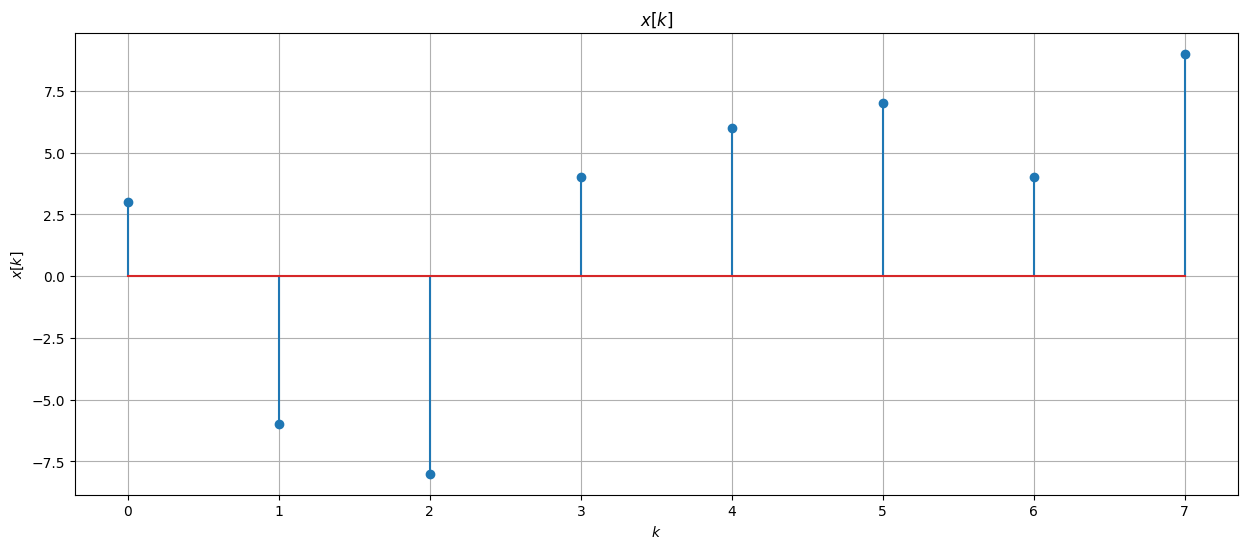

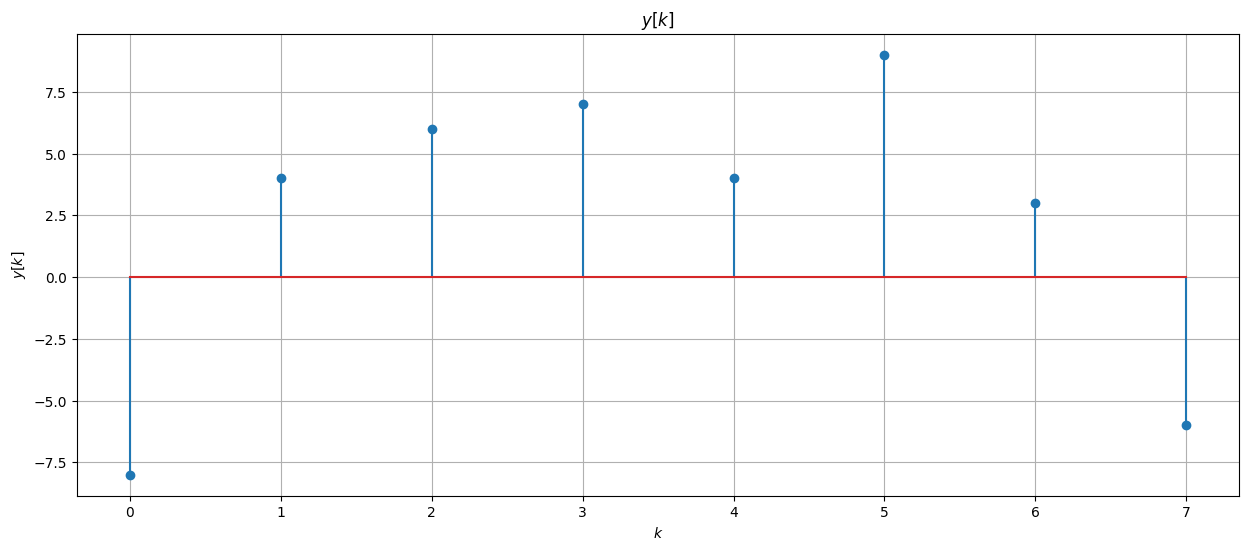

In [15]:
plt.figure(figsize=[15, 6])

plt.stem(num, x)

plt.title('$x[k]$')
plt.xlabel('$k$')
plt.ylabel('$x[k]$')

plt.grid()

Y_n = np.array ([np.exp(-1j * 2 * np.pi / 8 * m * n) * X[n] for n in range(8)])
Y_fft = np.fft.ifft(Y_n)

n = np.arange(8)

plt.figure(figsize=[15, 6])
plt.stem(n, Y_fft)

plt.title('$y[k]$')
plt.xlabel('$k$')
plt.ylabel('$y[k]$')

plt.grid()

## Задача 3.1. Интерполяция  ДВПФ добавлением нулевых отсчетов в сигнал.

Постройте на одном графике модули ДВПФ $\left| X(\nu ) \right|$ и ДПФ $\left| X[n] \right|$ последовательности ($N=32$)
$$x[k]=
\begin{cases}
   \sin \left( \dfrac{2\pi }{N}{{m}_{0}}k \right)+\sin \left( \dfrac{2\pi }{N}\left( {{m}_{0}}+0,25 \right)k \right) , \ 0\le k\le N-1;  \\
   0 , \ \ \text{при других }k.  \\
\end{cases}.$$
Увеличьте размерность ДПФ, добавив нулевые отсчеты так, чтобы все относительные частоты синусоид попадали на бины ДПФ.  Приведите на одном графике модули ДВПФ $\left| X(\nu ) \right|$ и ДПФ $\left| X[n] \right|$  для этого случая. Сравните результаты.
**Частоты синусоид не совпадают с бинами ДПФ**

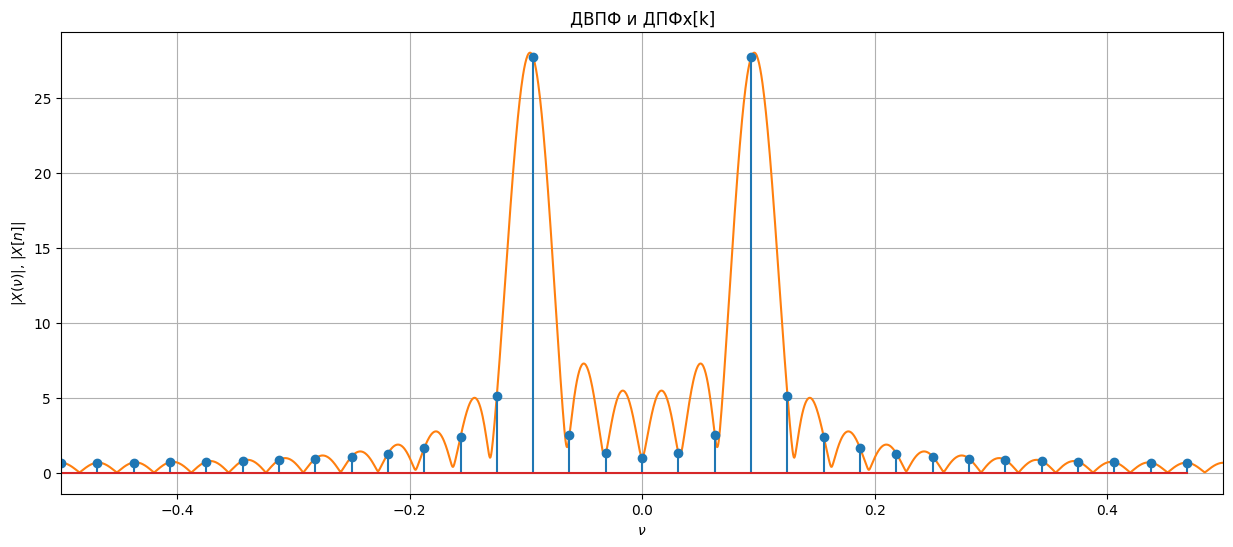

In [16]:
# Вариант 13
m_0 = 3
m_1 = -0.5

N = 32

k = np.arange (N)
n = np.arange (N)
x = np.sin ((2 * np.pi * m_0 * k) / N) + np.sin((2 * np.pi * (m_0+0.25) * k) / N)

plt.figure (figsize=[15, 6])

def dtft(x, M=2048): 
    return  np.arange(M)/M-0.5, np.fft.fftshift(np.fft.fft(x, M))

nu, X = dtft (x)
plt.plot (nu, abs (X), 'C1')

plt.stem(np.arange(N)/N-0.5, abs(np.fft.fftshift(np.fft.fft(x, N))))

plt.xlim([-0.5, 0.5])
plt.title('ДВПФ и ДПФx[k]')

plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$, $|X[n]|$')

plt.grid()

## Задача 3.2. ДВПФ и ДПФ периодической последовательсти.

Простройте графики для действительной  и мнимой части коэффициентов ДПФ $\tilde{X}[n]$ периодической последовательности $x[k]=\cos \left( \frac{2\pi }{N}mk \right)+\sin \left( \frac{2\pi }{N}mk \right)$  с периодом $N=32$, для случаев $m={{m}_{0}}$ и $m={{m}_{0}}+{{m}_{1}}$. Получите аналитическую запись ДПФ. Сравните ДПФ последовательности с ее ДВПФ. Определите, выполняется ли связь между весами дельта-функций в ДВПФ и величинами отсчетов ДПФ.

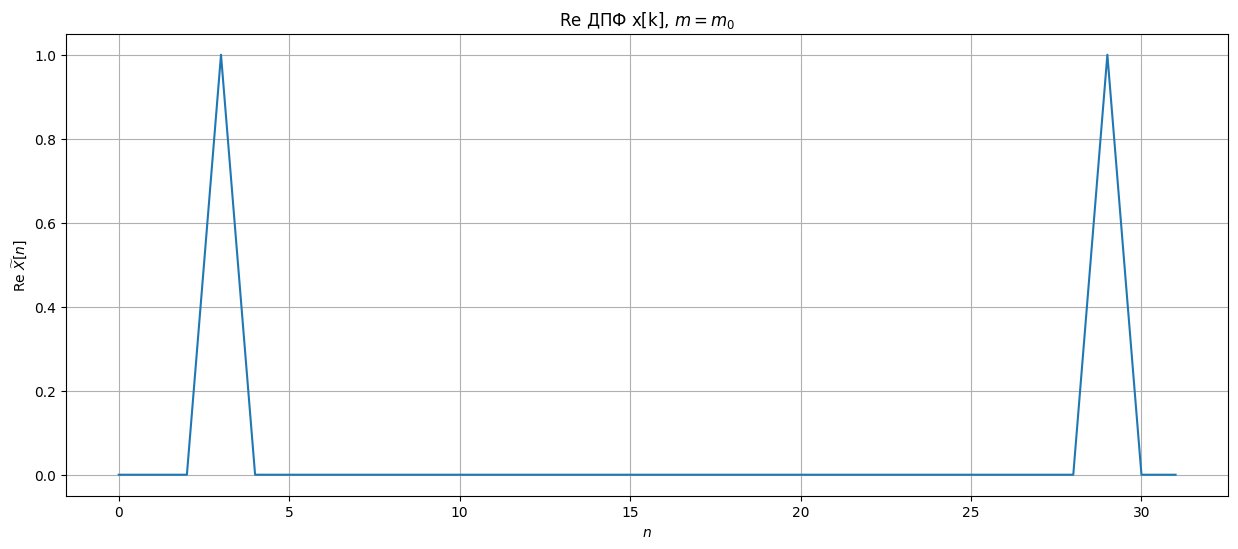

In [17]:
x = np.cos ((2 * np.pi * m_0 * k) / N) + np.cos((2 * np.pi * m_0 * k) / N)
X = np.fft.fft(x) / N

plt.figure(figsize=[15, 6])
plt.plot(n, X.real)

plt.title('Re ДПФ x[k], $m = m_0$')
plt.xlabel('$n$')
plt.ylabel('Re $\widetilde{X}[n]$')

plt.grid()

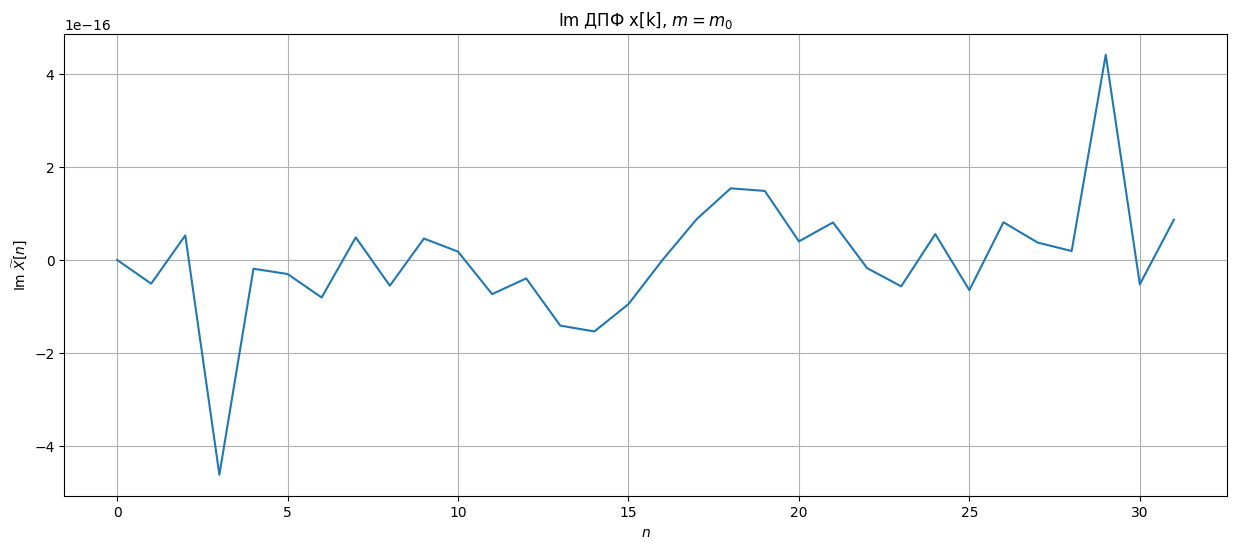

In [18]:
x = np.cos ((2 * np.pi * m_0 * k) / N) + np.cos((2 * np.pi * m_0 * k) / N)
X = np.fft.fft(x) / N

plt.figure(figsize=[15, 6])
plt.plot(n, X.imag)

plt.title('Im ДПФ x[k], $m = m_0$')
plt.xlabel('$n$')
plt.ylabel('Im $\widetilde{X}[n]$')

plt.grid()

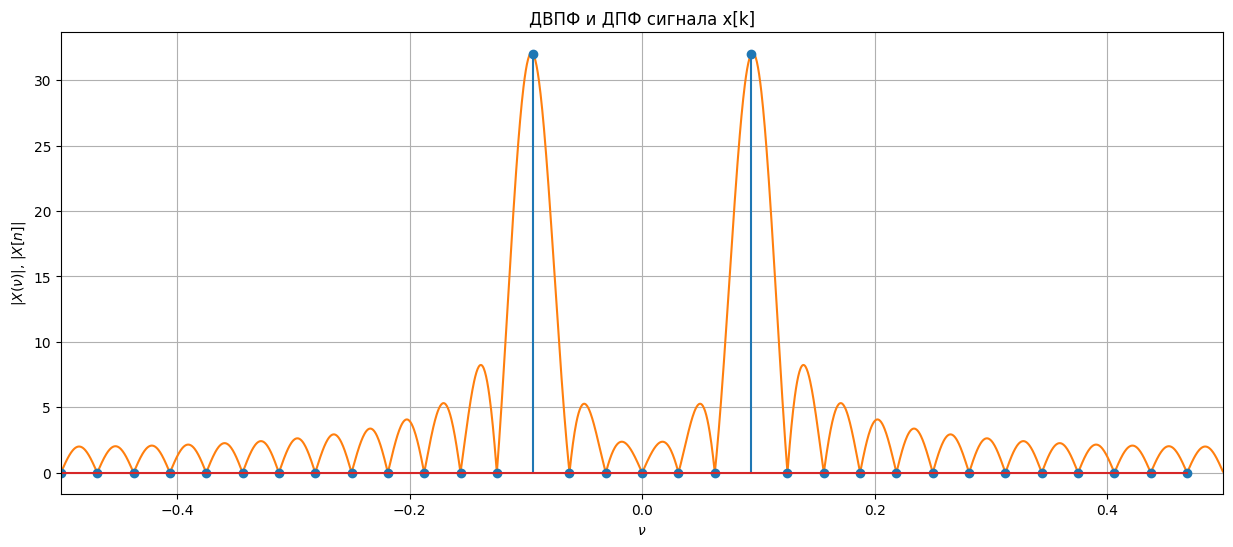

In [19]:
plt.figure(figsize=[15, 6])

nu, X = dtft(x)
plt.plot(nu, abs(X), 'C1')

plt.stem(np.arange(N)/N-0.5, abs(np.fft.fftshift(np.fft.fft(x, N))))

plt.xlim([-0.5, 0.5])
plt.title('ДВПФ и ДПФ сигнала x[k]')
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$, $|X[n]|$')

plt.grid()

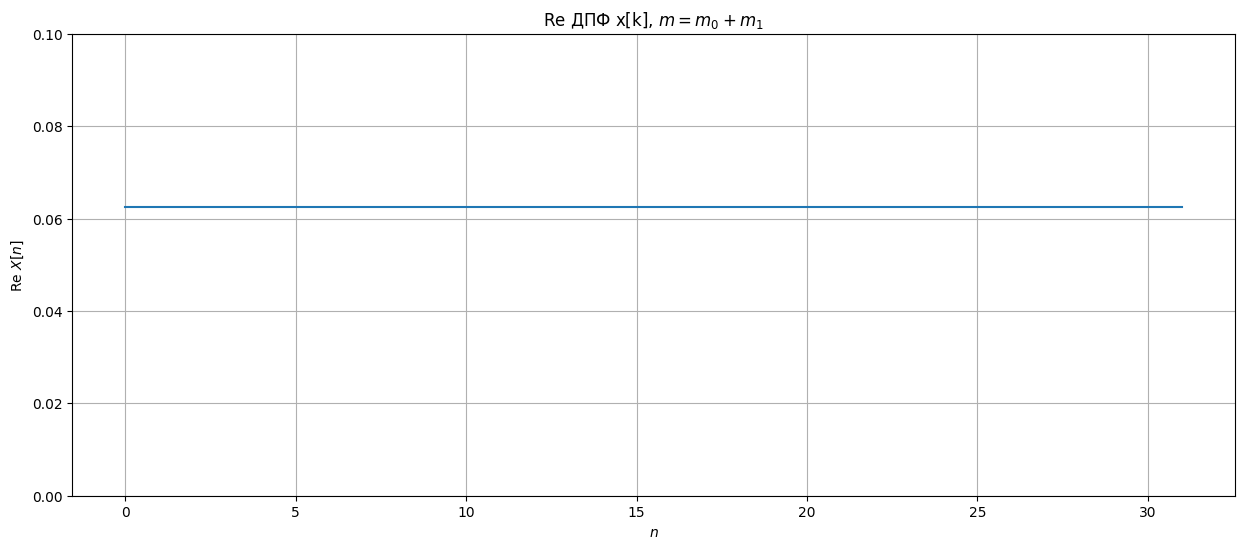

In [20]:
x = np.cos ((2 * np.pi * (m_0 + m_1) * k)/N) + np.cos ((2 * np.pi * (m_0+m_1) * k) / N)
X = np.fft.fft(x) / N

plt.figure(figsize=[15, 6])
plt.plot(n, X.real)

plt.title('Re ДПФ x[k], $m = m_0 + m_1$')
plt.xlabel('$n$')
plt.ylabel('Re $X[n]$')
plt.ylim([0, 0.1])

plt.grid()

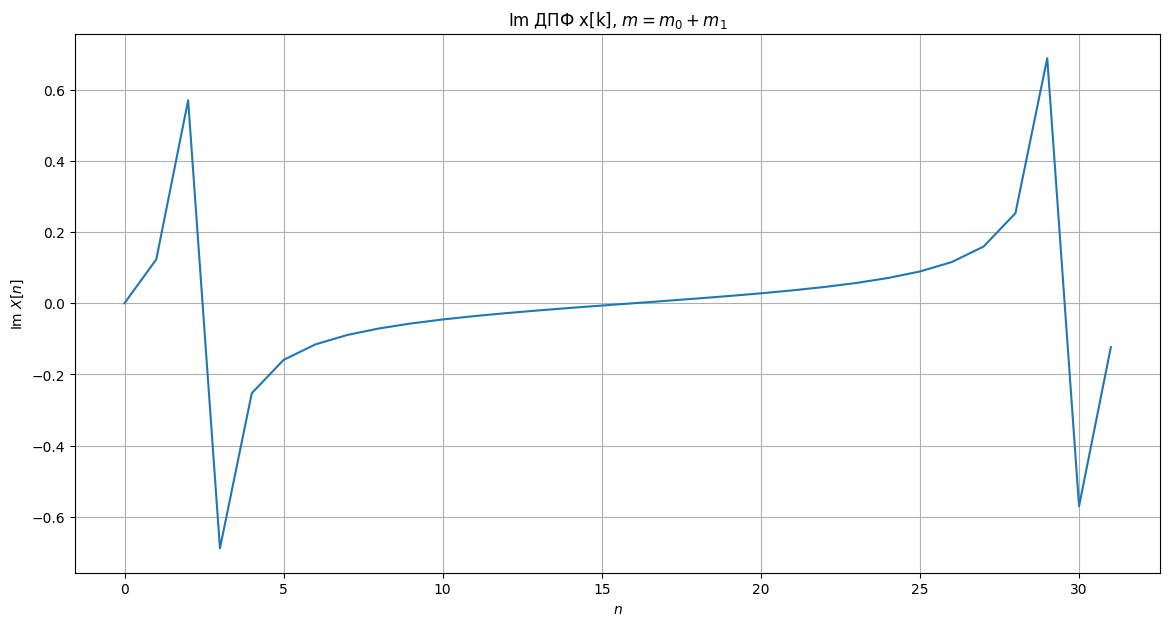

In [21]:
plt.figure(figsize=[14, 7])

plt.plot(n, X.imag)

plt.title('Im ДПФ x[k], $m = m_0 + m_1$')
plt.xlabel('$n$')
plt.ylabel('Im $X[n]$')

plt.grid()

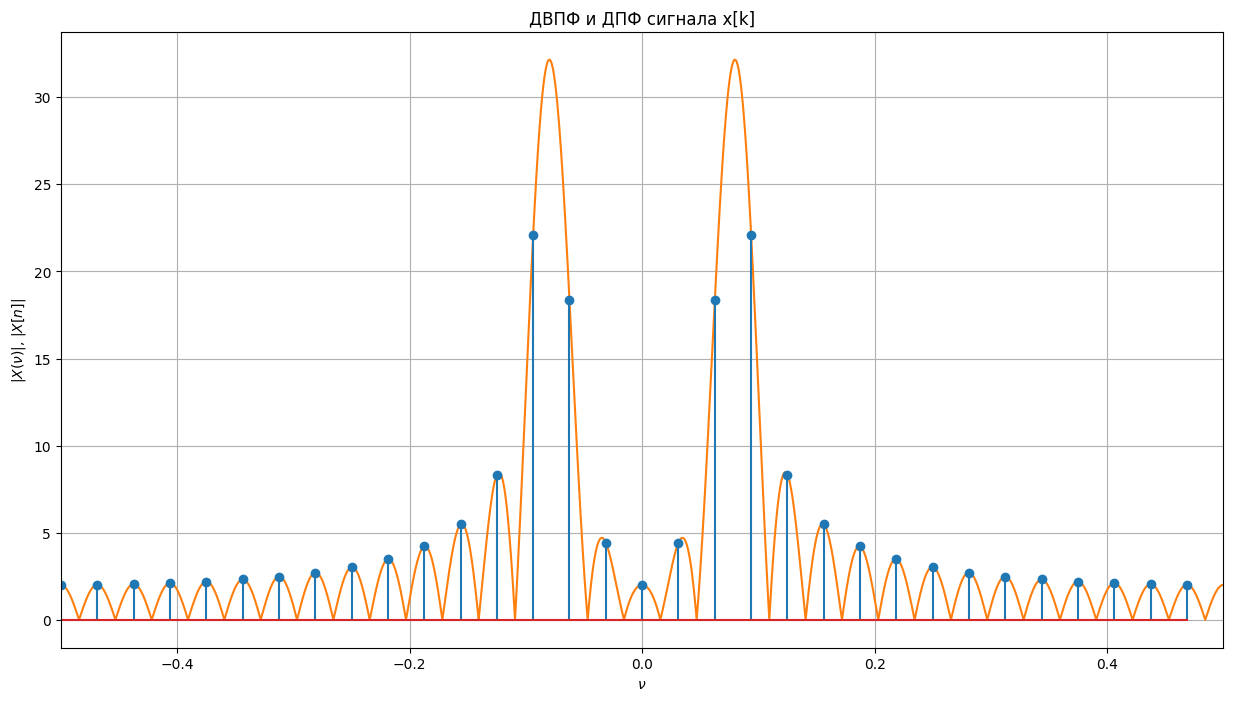

In [22]:
plt.figure(figsize=[15, 8])

nu, X = dtft(x)
plt.plot(nu, abs(X), 'C1')

plt.stem(np.arange(N)/N-0.5, abs(np.fft.fftshift(np.fft.fft(x, N))))

plt.xlim([-0.5, 0.5])
plt.title('ДВПФ и ДПФ сигнала x[k]')
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$, $|X[n]|$')

plt.grid()